In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import sklearn
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, f1_score, precision_score, recall_score, roc_curve, roc_auc_score
import scipy.stats as stats
assert sklearn.__version__ >= "0.20"
from sklearnex import patch_sklearn 
patch_sklearn()

# to make this notebook's output stable across runs
np.random.seed(42)

# to plot figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# for statistical data visualization
import seaborn as sns 

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

Intel(R) oneAPI Data Analytics Library solvers for sklearn enabled: https://intelpython.github.io/daal4py/sklearn.html


In [2]:
# loading the Hollywood movie dataset
hollywood_final = pd.read_csv('hollywood_final.csv')
hollywood_final

,budget,popularity,revenue,year,runtime,vote_average,vote_count,actor1_gender,actor2_gender,actor3_gender,...,Genre_Fantasy,Genre_Foreign,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_Thriller,Genre_War
0,94000000,9.915573,940335536.0,2003,100.0,7.6,5531.0,2,1.0,2,...,0,0,0,0,0,0,0,0,0,0
1,55000000,10.351236,677945399.0,1994,142.0,8.2,7204.0,2,1.0,2,...,0,0,0,0,0,0,0,0,0,0
2,15000000,8.191009,356296601.0,1999,122.0,7.9,2994.0,2,1.0,1,...,0,0,0,0,0,0,0,0,0,0
3,839727,3.826890,23217674.0,1941,119.0,7.9,1110.0,2,2.0,1,...,0,0,0,0,0,1,0,0,0,0
4,140000000,28.769026,655011224.0,2003,143.0,7.4,6368.0,2,2.0,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1849,45000000,2.704161,114501299.0,2016,105.0,5.4,479.0,2,1.0,2,...,0,0,0,0,0,0,0,0,0,0
1850,24000000,3.768481,64414761.0,2016,139.0,6.6,634.0,2,1.0,2,...,0,0,0,0,0,0,0,0,0,0
1851,5000000,7.222601,10025571.0,2017,98.0,6.7,400.0,1,1.0,2,...,0,0,0,0,0,0,0,0,0,0
1852,10500000,1.782013,5535981.0,2017,91.0,6.4,42.0,2,1.0,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# loading the Bollywood movie dataset
bollywood_final = pd.read_csv('bollywood_final.csv')
bollywood_final

,budget,popularity,revenue,year,runtime,vote_average,vote_count,actor1_gender,actor2_gender,actor3_gender,...,Genre_Fantasy,Genre_Foreign,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_Thriller,Genre_War
0,7000000,0.300848,29385320.0,2004,192.0,7.4,60.0,2,1.0,1,...,0,0,0,0,0,0,0,0,0,0
1,1101652,0.021427,5525109.0,2004,142.0,6.0,20.0,1,2.0,1,...,0,0,0,0,0,0,0,0,0,0
2,3947601,0.833918,13200241.0,2003,186.0,7.2,97.0,2,1.0,2,...,0,0,0,0,0,0,0,0,0,0
3,1710627,1.459324,19000000.0,2001,155.0,6.0,23.0,2,1.0,2,...,0,0,0,0,0,0,0,0,0,0
4,2073698,0.361776,6661755.0,1999,188.0,6.4,23.0,1,2.0,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,5200000,0.240306,27370034.0,2017,139.0,8.1,18.0,2,1.0,2,...,0,0,0,0,0,0,0,0,0,0
98,473712,0.545032,1982090.0,2016,138.0,5.7,15.0,1,1.0,1,...,0,0,0,0,0,0,0,0,0,0
99,4868708,0.312055,13685017.0,2017,146.0,5.8,10.0,1,1.0,2,...,0,0,0,0,0,0,0,0,0,0
100,4300000,0.646615,3376375.0,2016,149.0,7.0,38.0,1,2.0,2,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# creating a column 'profitability' for Hollywood dataset
for label, row in hollywood_final.iterrows():
    if row['revenue'] > row['budget']:
        hollywood_final.loc[label,'profitability'] = 1
    elif row['revenue'] == row['budget']:
        hollywood_final.loc[label,'profitability'] = 0
    else:
        hollywood_final.loc[label,'profitability'] = -1
hollywood_final

,budget,popularity,revenue,year,runtime,vote_average,vote_count,actor1_gender,actor2_gender,actor3_gender,...,Genre_Foreign,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_Thriller,Genre_War,profitability
0,94000000,9.915573,940335536.0,2003,100.0,7.6,5531.0,2,1.0,2,...,0,0,0,0,0,0,0,0,0,1.0
1,55000000,10.351236,677945399.0,1994,142.0,8.2,7204.0,2,1.0,2,...,0,0,0,0,0,0,0,0,0,1.0
2,15000000,8.191009,356296601.0,1999,122.0,7.9,2994.0,2,1.0,1,...,0,0,0,0,0,0,0,0,0,1.0
3,839727,3.826890,23217674.0,1941,119.0,7.9,1110.0,2,2.0,1,...,0,0,0,0,1,0,0,0,0,1.0
4,140000000,28.769026,655011224.0,2003,143.0,7.4,6368.0,2,2.0,2,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1849,45000000,2.704161,114501299.0,2016,105.0,5.4,479.0,2,1.0,2,...,0,0,0,0,0,0,0,0,0,1.0
1850,24000000,3.768481,64414761.0,2016,139.0,6.6,634.0,2,1.0,2,...,0,0,0,0,0,0,0,0,0,1.0
1851,5000000,7.222601,10025571.0,2017,98.0,6.7,400.0,1,1.0,2,...,0,0,0,0,0,0,0,0,0,1.0
1852,10500000,1.782013,5535981.0,2017,91.0,6.4,42.0,2,1.0,1,...,0,0,0,0,0,0,0,0,0,-1.0


In [5]:
# creating a column 'profitability' for Bollywood dataset
for label, row in bollywood_final.iterrows():
    if row['revenue'] > row['budget']:
        bollywood_final.loc[label,'profitability'] = 1
    elif row['revenue'] == row['budget']:
        bollywood_final.loc[label,'profitability'] = 0
    else:
        bollywood_final.loc[label,'profitability'] = -1
bollywood_final

,budget,popularity,revenue,year,runtime,vote_average,vote_count,actor1_gender,actor2_gender,actor3_gender,...,Genre_Foreign,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_Thriller,Genre_War,profitability
0,7000000,0.300848,29385320.0,2004,192.0,7.4,60.0,2,1.0,1,...,0,0,0,0,0,0,0,0,0,1.0
1,1101652,0.021427,5525109.0,2004,142.0,6.0,20.0,1,2.0,1,...,0,0,0,0,0,0,0,0,0,1.0
2,3947601,0.833918,13200241.0,2003,186.0,7.2,97.0,2,1.0,2,...,0,0,0,0,0,0,0,0,0,1.0
3,1710627,1.459324,19000000.0,2001,155.0,6.0,23.0,2,1.0,2,...,0,0,0,0,0,0,0,0,0,1.0
4,2073698,0.361776,6661755.0,1999,188.0,6.4,23.0,1,2.0,2,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,5200000,0.240306,27370034.0,2017,139.0,8.1,18.0,2,1.0,2,...,0,0,0,0,0,0,0,0,0,1.0
98,473712,0.545032,1982090.0,2016,138.0,5.7,15.0,1,1.0,1,...,0,0,0,0,0,0,0,0,0,1.0
99,4868708,0.312055,13685017.0,2017,146.0,5.8,10.0,1,1.0,2,...,0,0,0,0,0,0,0,0,0,1.0
100,4300000,0.646615,3376375.0,2016,149.0,7.0,38.0,1,2.0,2,...,0,0,0,0,0,0,0,0,0,-1.0


In [6]:
# creating a column 'more_female_actors' for Hollywood dataset
cols = ['actor1_gender','actor2_gender','actor3_gender','actor4_gender','actor5_gender']
for label, row in hollywood_final.iterrows():
    f,m=0,0
    for i in cols:
        if row[i] == 1:
            f = f+1
        else:
            m=m+1
    if f > m:
        hollywood_final.loc[label,'more_female_actors'] = 1
    else:
        hollywood_final.loc[label,'more_female_actors'] = 0
hollywood_final

,budget,popularity,revenue,year,runtime,vote_average,vote_count,actor1_gender,actor2_gender,actor3_gender,...,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_Thriller,Genre_War,profitability,more_female_actors
0,94000000,9.915573,940335536.0,2003,100.0,7.6,5531.0,2,1.0,2,...,0,0,0,0,0,0,0,0,1.0,0.0
1,55000000,10.351236,677945399.0,1994,142.0,8.2,7204.0,2,1.0,2,...,0,0,0,0,0,0,0,0,1.0,0.0
2,15000000,8.191009,356296601.0,1999,122.0,7.9,2994.0,2,1.0,1,...,0,0,0,0,0,0,0,0,1.0,1.0
3,839727,3.826890,23217674.0,1941,119.0,7.9,1110.0,2,2.0,1,...,0,0,0,1,0,0,0,0,1.0,0.0
4,140000000,28.769026,655011224.0,2003,143.0,7.4,6368.0,2,2.0,2,...,0,0,0,0,0,0,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1849,45000000,2.704161,114501299.0,2016,105.0,5.4,479.0,2,1.0,2,...,0,0,0,0,0,0,0,0,1.0,1.0
1850,24000000,3.768481,64414761.0,2016,139.0,6.6,634.0,2,1.0,2,...,0,0,0,0,0,0,0,0,1.0,0.0
1851,5000000,7.222601,10025571.0,2017,98.0,6.7,400.0,1,1.0,2,...,0,0,0,0,0,0,0,0,1.0,1.0
1852,10500000,1.782013,5535981.0,2017,91.0,6.4,42.0,2,1.0,1,...,0,0,0,0,0,0,0,0,-1.0,1.0


In [7]:
# creating a column 'more_female_actors' for Bollywood dataset
cols = ['actor1_gender','actor2_gender','actor3_gender','actor4_gender','actor5_gender']
for label, row in bollywood_final.iterrows():
    f,m=0,0
    for i in cols:
        if row[i] == 1:
            f = f+1
        else:
            m=m+1
    if f > m:
        bollywood_final.loc[label,'more_female_actors'] = 1
    else:
        bollywood_final.loc[label,'more_female_actors'] = 0
bollywood_final

,budget,popularity,revenue,year,runtime,vote_average,vote_count,actor1_gender,actor2_gender,actor3_gender,...,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_Thriller,Genre_War,profitability,more_female_actors
0,7000000,0.300848,29385320.0,2004,192.0,7.4,60.0,2,1.0,1,...,0,0,0,0,0,0,0,0,1.0,1.0
1,1101652,0.021427,5525109.0,2004,142.0,6.0,20.0,1,2.0,1,...,0,0,0,0,0,0,0,0,1.0,1.0
2,3947601,0.833918,13200241.0,2003,186.0,7.2,97.0,2,1.0,2,...,0,0,0,0,0,0,0,0,1.0,1.0
3,1710627,1.459324,19000000.0,2001,155.0,6.0,23.0,2,1.0,2,...,0,0,0,0,0,0,0,0,1.0,0.0
4,2073698,0.361776,6661755.0,1999,188.0,6.4,23.0,1,2.0,2,...,0,0,0,0,0,0,0,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,5200000,0.240306,27370034.0,2017,139.0,8.1,18.0,2,1.0,2,...,0,0,0,0,0,0,0,0,1.0,0.0
98,473712,0.545032,1982090.0,2016,138.0,5.7,15.0,1,1.0,1,...,0,0,0,0,0,0,0,0,1.0,1.0
99,4868708,0.312055,13685017.0,2017,146.0,5.8,10.0,1,1.0,2,...,0,0,0,0,0,0,0,0,1.0,0.0
100,4300000,0.646615,3376375.0,2016,149.0,7.0,38.0,1,2.0,2,...,0,0,0,0,0,0,0,0,-1.0,0.0


In [8]:
# creating a column 'more_female_core_crew' for Hollywood dataset
cols = ['director_gender','producer_gender','screeplay_gender','editor_gender']
for label, row in hollywood_final.iterrows():
    f,m=0,0
    for i in cols:
        if row[i] == 1:
            f = f+1
        else:
            m = m+1
    if f >= m:
        hollywood_final.loc[label,'more_female_core_crew'] = 1
    else:
        hollywood_final.loc[label,'more_female_core_crew'] = 0
hollywood_final

,budget,popularity,revenue,year,runtime,vote_average,vote_count,actor1_gender,actor2_gender,actor3_gender,...,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_Thriller,Genre_War,profitability,more_female_actors,more_female_core_crew
0,94000000,9.915573,940335536.0,2003,100.0,7.6,5531.0,2,1.0,2,...,0,0,0,0,0,0,0,1.0,0.0,0.0
1,55000000,10.351236,677945399.0,1994,142.0,8.2,7204.0,2,1.0,2,...,0,0,0,0,0,0,0,1.0,0.0,0.0
2,15000000,8.191009,356296601.0,1999,122.0,7.9,2994.0,2,1.0,1,...,0,0,0,0,0,0,0,1.0,1.0,0.0
3,839727,3.826890,23217674.0,1941,119.0,7.9,1110.0,2,2.0,1,...,0,0,1,0,0,0,0,1.0,0.0,0.0
4,140000000,28.769026,655011224.0,2003,143.0,7.4,6368.0,2,2.0,2,...,0,0,0,0,0,0,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1849,45000000,2.704161,114501299.0,2016,105.0,5.4,479.0,2,1.0,2,...,0,0,0,0,0,0,0,1.0,1.0,0.0
1850,24000000,3.768481,64414761.0,2016,139.0,6.6,634.0,2,1.0,2,...,0,0,0,0,0,0,0,1.0,0.0,0.0
1851,5000000,7.222601,10025571.0,2017,98.0,6.7,400.0,1,1.0,2,...,0,0,0,0,0,0,0,1.0,1.0,0.0
1852,10500000,1.782013,5535981.0,2017,91.0,6.4,42.0,2,1.0,1,...,0,0,0,0,0,0,0,-1.0,1.0,1.0


In [9]:
# creating a column 'more_female_core_crew' for Bollywood dataset
cols = ['director_gender','producer_gender','screeplay_gender','editor_gender']
for label, row in bollywood_final.iterrows():
    f,m=0,0
    for i in cols:
        if row[i] == 1:
            f = f+1
        else:
            m = m+1
    if f >= m:
        bollywood_final.loc[label,'more_female_core_crew'] = 1
    else:
        bollywood_final.loc[label,'more_female_core_crew'] = 0
bollywood_final

,budget,popularity,revenue,year,runtime,vote_average,vote_count,actor1_gender,actor2_gender,actor3_gender,...,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_Thriller,Genre_War,profitability,more_female_actors,more_female_core_crew
0,7000000,0.300848,29385320.0,2004,192.0,7.4,60.0,2,1.0,1,...,0,0,0,0,0,0,0,1.0,1.0,0.0
1,1101652,0.021427,5525109.0,2004,142.0,6.0,20.0,1,2.0,1,...,0,0,0,0,0,0,0,1.0,1.0,1.0
2,3947601,0.833918,13200241.0,2003,186.0,7.2,97.0,2,1.0,2,...,0,0,0,0,0,0,0,1.0,1.0,0.0
3,1710627,1.459324,19000000.0,2001,155.0,6.0,23.0,2,1.0,2,...,0,0,0,0,0,0,0,1.0,0.0,0.0
4,2073698,0.361776,6661755.0,1999,188.0,6.4,23.0,1,2.0,2,...,0,0,0,0,0,0,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,5200000,0.240306,27370034.0,2017,139.0,8.1,18.0,2,1.0,2,...,0,0,0,0,0,0,0,1.0,0.0,0.0
98,473712,0.545032,1982090.0,2016,138.0,5.7,15.0,1,1.0,1,...,0,0,0,0,0,0,0,1.0,1.0,0.0
99,4868708,0.312055,13685017.0,2017,146.0,5.8,10.0,1,1.0,2,...,0,0,0,0,0,0,0,1.0,0.0,1.0
100,4300000,0.646615,3376375.0,2016,149.0,7.0,38.0,1,2.0,2,...,0,0,0,0,0,0,0,-1.0,0.0,1.0


In [10]:
# sorting Hollywood dataframe by year in ascending order
hollywood_sorted_df = hollywood_final.sort_values("year")
hollywood_sorted_df

,budget,popularity,revenue,year,runtime,vote_average,vote_count,actor1_gender,actor2_gender,actor3_gender,...,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_Thriller,Genre_War,profitability,more_female_actors,more_female_core_crew
162,110000,0.360068,11000000.0,1915,190.0,6.3,91.0,1,1.0,2,...,0,0,0,0,0,0,0,1.0,1.0,0.0
476,385907,0.597571,8394751.0,1916,197.0,7.5,53.0,1,1.0,2,...,0,0,0,0,0,0,0,1.0,0.0,0.0
266,923000,1.013080,2500000.0,1925,95.0,7.7,272.0,2,1.0,2,...,0,0,0,0,0,0,0,1.0,0.0,1.0
477,245000,0.228818,22000000.0,1925,151.0,7.0,21.0,2,1.0,2,...,0,0,0,0,0,0,0,1.0,1.0,0.0
26,355000,1.283226,1012189.0,1931,72.0,7.1,233.0,1,1.0,2,...,1,0,0,0,0,0,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1840,55000000,3.436807,378827494.0,2017,118.0,6.0,2053.0,1,2.0,2,...,0,0,0,0,0,0,0,1.0,1.0,0.0
1802,125000000,9.717010,350607133.0,2017,110.0,5.3,1380.0,2,2.0,1,...,0,0,0,0,0,0,0,1.0,0.0,0.0
1799,175000000,30.119834,140331333.0,2017,126.0,6.4,818.0,2,2.0,2,...,0,0,0,0,0,0,0,-1.0,0.0,0.0
1730,230000000,14.486223,767451736.0,2017,129.0,6.5,1827.0,2,2.0,2,...,0,0,0,0,0,0,0,1.0,0.0,0.0


In [11]:
# a,b,c,d,e,f,g,h,i,j,k=0,0,0,0,0,0,0,0,0,0,0
# for y in hollywood_sorted_df['year']:
#     if y >= 1910 and y <= 1919:
#         a += 1
#     elif y >= 1920 and y <= 1929:
#         b += 1
#     elif y >= 1930 and y <= 1939:
#         c += 1
#     elif y >= 1940 and y <= 1949:
#         d += 1
#     elif y >= 1950 and y <= 1959:
#         e += 1
#     elif y >= 1960 and y <= 1969:
#         f += 1
#     elif y >= 1970 and y <= 1979:
#         g += 1
#     elif y >= 1980 and y <= 1989:
#         h += 1
#     elif y >= 1990 and y <= 1999:
#         i += 1
#     elif y >= 2000 and y <= 2009:
#         j += 1
#     else:
#         k += 1
# print(f"a: {a}\n")
# print(f"b: {b}\n")
# print(f"c: {c}\n")
# print(f"d: {d}\n")
# print(f"e: {e}\n")
# print(f"f: {f}\n")
# print(f"g: {g}\n")
# print(f"h: {h}\n")
# print(f"i: {i}\n")
# print(f"j: {j}\n")
# print(f"k: {k}\n")

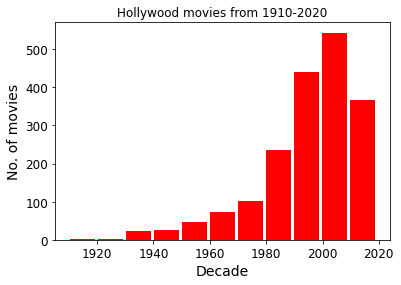

In [12]:
# A histogram of Hollywood movies in each decade
year = list(hollywood_sorted_df['year'])
range = (1910, 2019)
bins = 11
plt.hist(year, bins, range, color = 'red', histtype = 'bar', rwidth = 0.9)
plt.xlabel('Decade')
plt.ylabel('No. of movies')
plt.title('Hollywood movies from 1910-2020')
plt.show()

In [13]:
# Pearson coefficient between 'year' and 'more_female_core_crew' for Hollywood movies
R = stats.pearsonr(hollywood_sorted_df['year'], hollywood_sorted_df['more_female_core_crew'])
print(R)

(0.0679354156029976, 0.0034271296677245784)


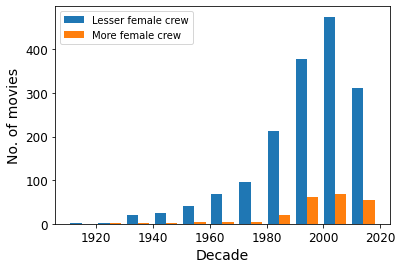

In [14]:
# A histogram depicting female involvement in main crew roles over the decades
x = list(hollywood_sorted_df['year'].loc[hollywood_sorted_df['more_female_core_crew']==0])
y = list(hollywood_sorted_df['year'].loc[hollywood_sorted_df['more_female_core_crew']==1])
range = (1910, 2019)
bins = 11
plt.hist([x,y], bins, range, label=['Lesser female crew', 'More female crew'])
plt.xlabel('Decade')
plt.ylabel('No. of movies')
plt.legend(loc='upper left')
plt.show()

In [15]:
# Pearson coefficient between 'budget' and 'more_female_core_crew' for Hollywood movies
R = stats.pearsonr(hollywood_sorted_df['budget'], hollywood_sorted_df['more_female_core_crew'])
print(R)

(-0.0556300473746719, 0.01659482431782983)


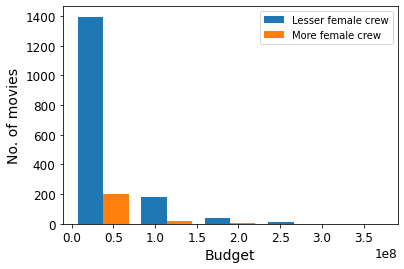

In [16]:
# A histogram depicting budget of movies in accordance with female involvement in main crew roles
x = list(hollywood_sorted_df['budget'].loc[hollywood_sorted_df['more_female_core_crew']==0])
y = list(hollywood_sorted_df['budget'].loc[hollywood_sorted_df['more_female_core_crew']==1])
range = (10000, 380000000)
bins = 5
plt.hist([x,y], bins, range, label=['Lesser female crew', 'More female crew'])
plt.xlabel('Budget')
plt.ylabel('No. of movies')
plt.legend(loc='upper right')
plt.show()

In [17]:
# Pearson coefficient between 'revenue' and 'more_female_core_crew' for Hollywood movies
R = stats.pearsonr(hollywood_sorted_df['revenue'], hollywood_sorted_df['more_female_core_crew'])
print(R)

(-0.040883283259125956, 0.0784239043354521)


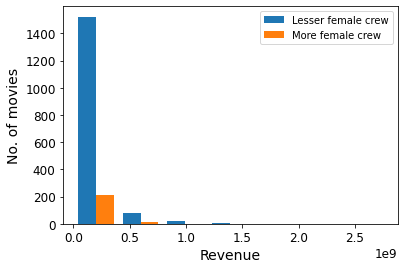

In [18]:
# A histogram depicting revenue of movies in accordance with female involvement in main crew roles
x = list(hollywood_sorted_df['revenue'].loc[hollywood_sorted_df['more_female_core_crew']==0])
y = list(hollywood_sorted_df['revenue'].loc[hollywood_sorted_df['more_female_core_crew']==1])
range = (2970, 2781505847)
bins = 7
plt.hist([x,y], bins, range, label=['Lesser female crew', 'More female crew'])
plt.xlabel('Revenue')
plt.ylabel('No. of movies')
plt.legend(loc='upper right')
plt.show()

In [19]:
# Pearson coefficient between 'profitability' and 'more_female_core_crew' for Hollywood movies
R = stats.pearsonr(hollywood_sorted_df['profitability'], hollywood_sorted_df['more_female_core_crew'])
print(R)

(-0.07905616381960064, 0.0006567009319374598)


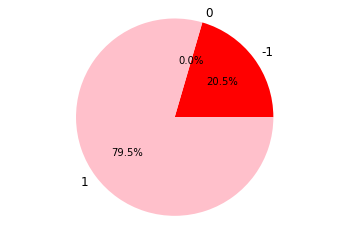

In [20]:
# A piechart depicting profitability of movies where the number of women involved in the main crew roles are less
x = list(hollywood_sorted_df['profitability'].loc[hollywood_sorted_df['more_female_core_crew']==0])
a,b,c=0,0,0
for i in x:
    if i == -1:
        a += 1
    elif i == 0:
        b += 1
    else:
        c += 1
labels = '-1', '0', '1'
sizes = [a,b,c]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%',colors=['red','green','pink'])
ax.axis('equal') 
plt.show()

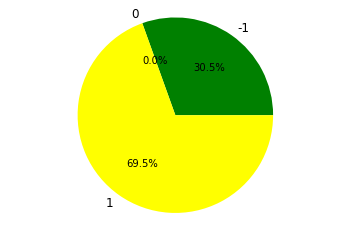

In [21]:
# A piechart depicting profitability of movies where the number of women involved in the main crew roles are more
y = list(hollywood_sorted_df['profitability'].loc[hollywood_sorted_df['more_female_core_crew']==1])
d,e,f=0,0,0
for i in y:
    if i == -1:
        d += 1
    elif i == 0:
        e += 1
    else:
        f += 1
labels = '-1', '0', '1'
sizes = [d,e,f]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%',colors=['green','brown','yellow'])
ax.axis('equal') 
plt.show()

In [22]:
# Pearson coefficient between 'popularity' and 'more_female_core_crew' for Hollywood movies
R = stats.pearsonr(hollywood_sorted_df['popularity'], hollywood_sorted_df['more_female_core_crew'])
print(R)

(-0.051444887703062, 0.02675375051383975)


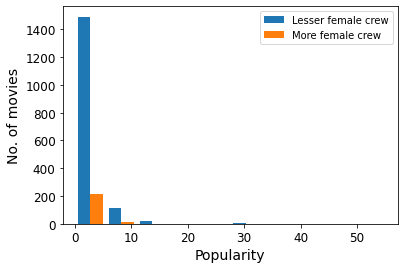

In [23]:
# A histogram depicting popularity of movies in accordance with female involvement in main crew roles
x = list(hollywood_sorted_df['popularity'].loc[hollywood_sorted_df['more_female_core_crew']==0])
y = list(hollywood_sorted_df['popularity'].loc[hollywood_sorted_df['more_female_core_crew']==1])
range = (0,55)
bins = 10
plt.hist([x,y], bins, range, label=['Lesser female crew', 'More female crew'])
plt.xlabel('Popularity')
plt.ylabel('No. of movies')
plt.legend(loc='upper right')
plt.show()

In [24]:
# Pearson coefficient between 'vote_average' and 'more_female_core_crew' for Hollywood movies
R = stats.pearsonr(hollywood_sorted_df['vote_average'], hollywood_sorted_df['more_female_core_crew'])
print(R)

(-0.023273335738964007, 0.31655352508514645)


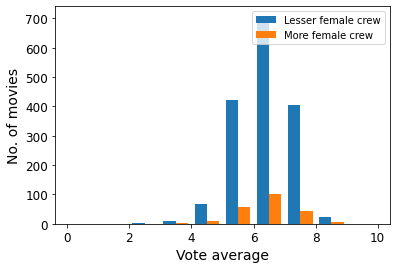

In [25]:
# A histogram depicting vote average of movies in accordance with female involvement in main crew roles
x = list(hollywood_sorted_df['vote_average'].loc[hollywood_sorted_df['more_female_core_crew']==0])
y = list(hollywood_sorted_df['vote_average'].loc[hollywood_sorted_df['more_female_core_crew']==1])
range = (0,10)
bins = 10
plt.hist([x,y], bins, range, label=['Lesser female crew', 'More female crew'])
plt.xlabel('Vote average')
plt.ylabel('No. of movies')
plt.legend(loc='upper right')
plt.show()

In [31]:
# sorting Bollywood dataframe by year in ascending order
bollywood_sorted_df = bollywood_final.sort_values("year")
bollywood_sorted_df

,budget,popularity,revenue,year,runtime,vote_average,vote_count,actor1_gender,actor2_gender,actor3_gender,...,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_Thriller,Genre_War,profitability,more_female_actors,more_female_core_crew
43,91194,0.000477,911942.0,1978,166.0,6.0,18.0,2,1.0,2,...,0,0,0,0,0,0,0,1.0,0.0,0.0
60,368685,0.040359,2344995.0,1989,174.0,7.0,2.0,1,2.0,2,...,0,0,0,0,0,0,0,1.0,0.0,0.0
89,260555,0.000027,15000000.0,1990,128.0,5.3,2.0,2,2.0,1,...,0,0,0,0,0,0,0,1.0,0.0,0.0
58,260555,0.061409,2605550.0,1990,172.0,6.9,6.0,2,1.0,2,...,0,0,0,0,0,0,0,1.0,0.0,0.0
84,117557,0.003570,14000000.0,1991,190.0,0.0,0.0,2,1.0,2,...,0,0,0,0,0,0,0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,1500000,0.077591,6525384.0,2016,149.0,4.7,7.0,1,2.0,2,...,0,0,0,0,0,0,0,1.0,0.0,0.0
94,521873,0.289193,1013926.0,2016,127.0,7.0,24.0,2,1.0,1,...,0,0,0,0,0,1,0,1.0,1.0,0.0
101,5900000,0.141835,2100000.0,2016,143.0,3.5,4.0,1,2.0,2,...,0,1,0,0,0,0,0,-1.0,1.0,0.0
97,5200000,0.240306,27370034.0,2017,139.0,8.1,18.0,2,1.0,2,...,0,0,0,0,0,0,0,1.0,0.0,0.0


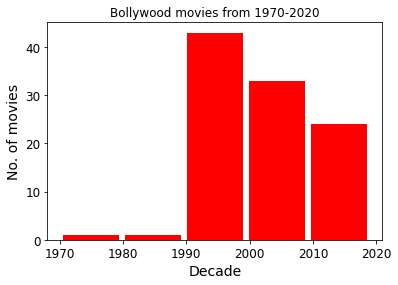

In [33]:
# A histogram of Bollywood movies in each decade
year = list(bollywood_sorted_df['year'])
range = (1970, 2019)
bins = 5
plt.hist(year, bins, range, color = 'red', histtype = 'bar', rwidth = 0.9)
plt.xlabel('Decade')
plt.ylabel('No. of movies')
plt.title('Bollywood movies from 1970-2020')
plt.show()

In [34]:
# Pearson coefficient between 'year' and 'more_female_core_crew' for Bollywood movies
R = stats.pearsonr(bollywood_sorted_df['year'], bollywood_sorted_df['more_female_core_crew'])
print(R)

(0.2631980941815033, 0.007524191014330228)


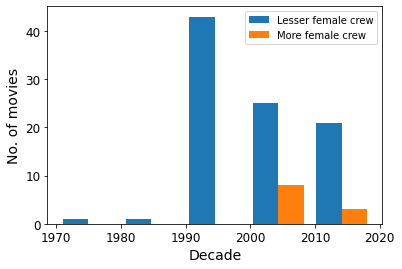

In [35]:
# A histogram depicting female involvement in main crew roles over the decades
x = list(bollywood_sorted_df['year'].loc[bollywood_sorted_df['more_female_core_crew']==0])
y = list(bollywood_sorted_df['year'].loc[bollywood_sorted_df['more_female_core_crew']==1])
range = (1970, 2019)
bins = 5
plt.hist([x,y], bins, range, label=['Lesser female crew', 'More female crew'])
plt.xlabel('Decade')
plt.ylabel('No. of movies')
plt.legend(loc='upper right')
plt.show()

In [36]:
# Pearson coefficient between 'budget' and 'more_female_core_crew' for Bollywood movies
R = stats.pearsonr(bollywood_sorted_df['budget'], bollywood_sorted_df['more_female_core_crew'])
print(R)

(0.18451086066340783, 0.06338582315926414)


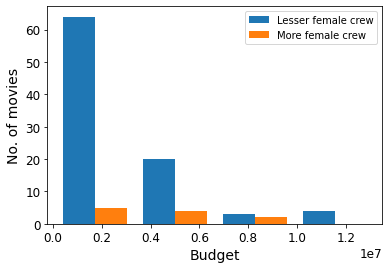

In [37]:
# A histogram depicting budget of movies in accordance with female involvement in main crew roles
x = list(bollywood_sorted_df['budget'].loc[bollywood_sorted_df['more_female_core_crew']==0])
y = list(bollywood_sorted_df['budget'].loc[bollywood_sorted_df['more_female_core_crew']==1])
range = (73000, 13200000)
bins = 4
plt.hist([x,y], bins, range, label=['Lesser female crew', 'More female crew'])
plt.xlabel('Budget')
plt.ylabel('No. of movies')
plt.legend(loc='upper right')
plt.show()

In [38]:
# Pearson coefficient between 'revenue' and 'more_female_core_crew' for Bollywood movies
R = stats.pearsonr(bollywood_sorted_df['revenue'], bollywood_sorted_df['more_female_core_crew'])
print(R)

(0.20460016474762047, 0.03913462385479516)


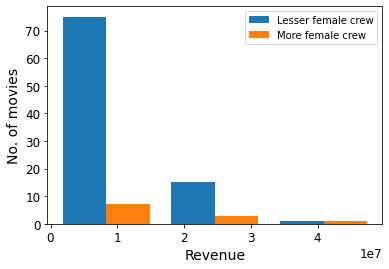

In [39]:
# A histogram depicting revenue of movies in accordance with female involvement in main crew roles
x = list(bollywood_sorted_df['revenue'].loc[bollywood_sorted_df['more_female_core_crew']==0])
y = list(bollywood_sorted_df['revenue'].loc[bollywood_sorted_df['more_female_core_crew']==1])
range = (190000, 49028000)
bins = 3
plt.hist([x,y], bins, range, label=['Lesser female crew', 'More female crew'])
plt.xlabel('Revenue')
plt.ylabel('No. of movies')
plt.legend(loc='upper right')
plt.show()

In [40]:
# Pearson coefficient between 'profitability' and 'more_female_core_crew' for Bollywood movies
R = stats.pearsonr(bollywood_sorted_df['profitability'], bollywood_sorted_df['more_female_core_crew'])
print(R)

(-0.18174011810679153, 0.0675315910347295)


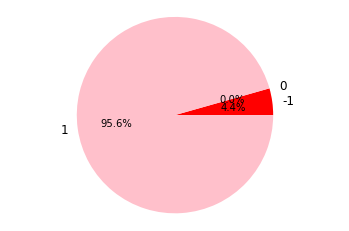

In [41]:
# A piechart depicting profitability of movies where the number of women involved in the main crew roles are less
x = list(bollywood_sorted_df['profitability'].loc[bollywood_sorted_df['more_female_core_crew']==0])
a,b,c=0,0,0
for i in x:
    if i == -1:
        a += 1
    elif i == 0:
        b += 1
    else:
        c += 1
labels = '-1', '0', '1'
sizes = [a,b,c]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%',colors=['red','green','pink'])
ax.axis('equal') 
plt.show()

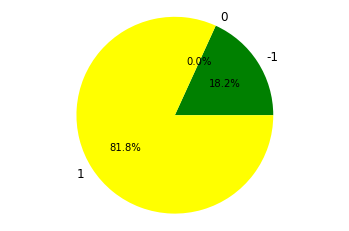

In [42]:
# A piechart depicting profitability of movies where the number of women involved in the main crew roles are more
y = list(bollywood_sorted_df['profitability'].loc[bollywood_sorted_df['more_female_core_crew']==1])
d,e,f=0,0,0
for i in y:
    if i == -1:
        d += 1
    elif i == 0:
        e += 1
    else:
        f += 1
labels = '-1', '0', '1'
sizes = [d,e,f]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%',colors=['green','brown','yellow'])
ax.axis('equal') 
plt.show()

In [43]:
# Pearson coefficient between 'popularity' and 'more_female_core_crew' for Bollywood movies
R = stats.pearsonr(bollywood_sorted_df['popularity'], bollywood_sorted_df['more_female_core_crew'])
print(R)

(0.15976509888503632, 0.1087177612509738)


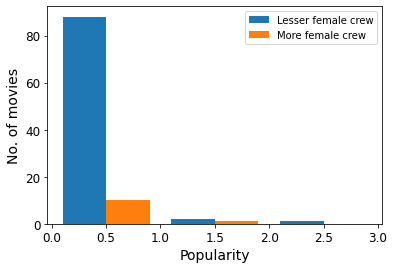

In [44]:
# A histogram depicting popularity of movies in accordance with female involvement in main crew roles
x = list(bollywood_sorted_df['popularity'].loc[bollywood_sorted_df['more_female_core_crew']==0])
y = list(bollywood_sorted_df['popularity'].loc[bollywood_sorted_df['more_female_core_crew']==1])
range = (0,3)
bins = 3
plt.hist([x,y], bins, range, label=['Lesser female crew', 'More female crew'])
plt.xlabel('Popularity')
plt.ylabel('No. of movies')
plt.legend(loc='upper right')
plt.show()

In [45]:
# Pearson coefficient between 'vote_average' and 'more_female_core_crew' for Bollywood movies
R = stats.pearsonr(bollywood_sorted_df['vote_average'], bollywood_sorted_df['more_female_core_crew'])
print(R)

(0.12563179831276147, 0.2083292217938797)


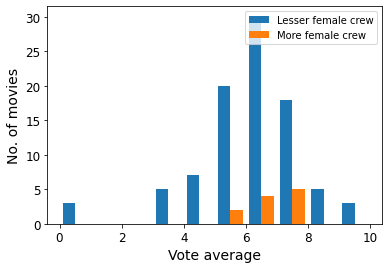

In [46]:
# A histogram depicting vote average of movies in accordance with female involvement in main crew roles
x = list(bollywood_sorted_df['vote_average'].loc[bollywood_sorted_df['more_female_core_crew']==0])
y = list(bollywood_sorted_df['vote_average'].loc[bollywood_sorted_df['more_female_core_crew']==1])
range = (0,10)
bins = 10
plt.hist([x,y], bins, range, label=['Lesser female crew', 'More female crew'])
plt.xlabel('Vote average')
plt.ylabel('No. of movies')
plt.legend(loc='upper right')
plt.show()

# FACTORS INFLUENCING FEMALE REPRESENTATION OFFSCREEN

In [52]:
# Splitting the Hollywood dataset into their independent and dependent variables
X = hollywood_sorted_df.drop(['actor1_gender','actor2_gender','actor3_gender','actor4_gender','actor5_gender','director_gender','producer_gender','screeplay_gender','editor_gender','more_female_core_crew'],axis=1)
Y = hollywood_sorted_df['more_female_core_crew']

In [53]:
Y

162     0.0
476     0.0
266     1.0
477     0.0
26      0.0
       ... 
1840    0.0
1802    0.0
1799    0.0
1730    0.0
1820    0.0
Name: more_female_core_crew, Length: 1854, dtype: float64

In [54]:
# Splitting into train and test sets with 80:20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [55]:
X_train.shape, X_test.shape

((1483, 27), (371, 27))

In [56]:
cols = X_train.columns

In [57]:
# scaling input features using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train,columns=[cols])

X_test = pd.DataFrame(X_test,columns=[cols])

In [58]:
X_train

,budget,popularity,revenue,year,runtime,vote_average,vote_count,Genre_Action,Genre_Adventure,Genre_Animation,...,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_Thriller,Genre_War,profitability,more_female_actors
0,0.131556,0.079521,0.037561,0.882353,0.250000,0.694915,0.110290,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.105240,0.030917,0.044842,0.872549,0.500000,0.796610,0.037935,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.049975,0.059469,0.050837,0.784314,0.302326,0.677966,0.143449,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.060502,0.077208,0.132979,0.813725,0.308140,0.677966,0.132727,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.042080,0.025370,0.001023,0.901961,0.273256,0.711864,0.007299,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,0.157873,0.022832,0.013352,0.813725,0.226744,0.389831,0.018922,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1479,0.157873,0.061112,0.078883,0.872549,0.360465,0.762712,0.157866,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1480,0.022343,0.032486,0.008072,0.960784,0.174419,0.525424,0.006848,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1481,0.092081,0.018403,0.008470,0.745098,0.250000,0.627119,0.010813,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
X_test

,budget,popularity,revenue,year,runtime,vote_average,vote_count,Genre_Action,Genre_Adventure,Genre_Animation,...,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_Thriller,Genre_War,profitability,more_female_actors
0,0.071028,0.021589,0.005802,0.784314,0.209302,0.627119,0.007118,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.131556,0.021451,0.017615,0.774510,0.209302,0.338983,0.008560,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.094713,0.010660,0.026603,0.803922,0.517442,0.728814,0.025770,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.447354,0.113054,0.142584,0.950980,0.354651,0.542373,0.262119,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.005324,0.043735,0.001430,0.225490,0.209302,0.847458,0.013876,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,0.001290,0.027370,0.003654,0.725490,0.116279,0.389831,0.012525,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
367,0.342088,0.156972,0.304663,0.960784,0.465116,0.830508,0.539016,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
368,0.034185,0.033728,0.012857,0.735294,0.104651,0.559322,0.024689,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
369,0.236822,0.068585,0.072476,0.911765,0.273256,0.508475,0.087313,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [60]:
# Splitting the Bollywood dataset into their independent and dependent variables
X1 = bollywood_sorted_df.drop(['actor1_gender','actor2_gender','actor3_gender','actor4_gender','actor5_gender','director_gender','producer_gender','screeplay_gender','editor_gender','more_female_core_crew'],axis=1)
Y1 = bollywood_sorted_df['more_female_core_crew']

In [61]:
Y1

43     0.0
60     0.0
89     0.0
58     0.0
84     0.0
      ... 
92     0.0
94     0.0
101    0.0
97     0.0
99     1.0
Name: more_female_core_crew, Length: 102, dtype: float64

In [62]:
# Splitting into train and test sets with 80:20 ratio
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.20, random_state = 0)

In [63]:
X1_train.shape, X1_test.shape

((81, 27), (21, 27))

In [64]:
cols = X1_train.columns

In [65]:
# scaling input features using MinMaxScaler

scaler = MinMaxScaler()

X1_train = scaler.fit_transform(X1_train)

X1_test = scaler.transform(X1_test)

X1_train = pd.DataFrame(X1_train,columns=[cols])

X1_test = pd.DataFrame(X1_test,columns=[cols])

In [66]:
X1_train

,budget,popularity,revenue,year,runtime,vote_average,vote_count,Genre_Action,Genre_Adventure,Genre_Animation,...,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_Thriller,Genre_War,profitability,more_female_actors
0,0.132664,0.074800,0.164360,0.692308,0.443299,0.700000,0.034325,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.014288,0.023684,0.049460,0.307692,0.546392,0.766667,0.013730,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.756228,0.003711,0.452128,0.820513,0.371134,0.588889,0.034325,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.093471,0.109807,0.221344,0.564103,0.608247,0.755556,0.043478,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.389369,0.297357,0.357026,0.589744,0.938144,0.833333,0.196796,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.034195,0.112215,0.016871,0.974359,0.082474,0.777778,0.054920,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
77,0.558163,0.158633,0.344199,0.717949,0.762887,0.677778,0.089245,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
78,0.162284,0.025413,0.141140,0.692308,0.237113,0.588889,0.029748,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
79,0.421041,0.048126,0.127155,0.589744,0.608247,0.588889,0.022883,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [67]:
X1_test

,budget,popularity,revenue,year,runtime,vote_average,vote_count,Genre_Action,Genre_Adventure,Genre_Animation,...,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_Thriller,Genre_War,profitability,more_female_actors
0,0.291537,0.000251,0.364675,0.487179,0.144330,0.888889,0.002288,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.449989,0.171347,0.301200,0.974359,0.309278,0.822222,0.057208,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.014288,-0.000173,0.303247,0.307692,0.092784,0.588889,0.004577,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.093683,0.008631,0.035909,0.641026,0.402062,0.444444,0.002288,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.011507,0.081187,0.314229,0.923077,0.030928,0.755556,0.061785,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.504837,0.007291,0.630861,0.871795,0.247423,0.611111,0.048055,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.007872,0.055532,0.000737,0.410256,0.443299,1.000000,0.002288,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
7,0.063552,0.011923,0.109427,0.717949,0.195876,0.500000,0.018307,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.295163,0.323929,0.266396,0.641026,0.690722,0.800000,0.221968,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
9,0.352480,0.039538,0.630861,0.743590,0.484536,0.733333,0.050343,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### GENERALIZED LINEAR REGRESSION

In [74]:
from sklearn.linear_model import LogisticRegression
C = [100, 10, 1, .1,.01, .001]

In [75]:
# Logistic Regression for Hollywood data 
for c in C:
    lr = LogisticRegression(penalty='l1', C=c, solver='saga', random_state=42, max_iter=5000)
    lr.fit(X_train, Y_train)
    Y_pred=lr.predict(X_test)
    print('\nC:', c)
    print('Coefficient of each feature:\n')
    i = 0
    for column in X:
        print(f"{column}: {lr.coef_[0][i]}")
        i += 1
    print("\n")
    # Evaluation metrics
    print(classification_report(Y_test, Y_pred))
    print("\nAccuracy:", accuracy_score(Y_test, Y_pred))
    conf_mat = confusion_matrix(Y_test, Y_pred)
    tp = conf_mat[0,0]
    tn = conf_mat[1,1]
    fp = conf_mat[0,1]
    fn = conf_mat[1,0]
    precision = tp / float(tp + fp)
    recall = tp / float(tp + fn)
    f_measure = (2*recall*precision)/float(recall+precision)
    print('F measure : {0:0.4f}'.format(f_measure))


C: 100
Coefficient of each feature:

budget: -1.039063187079381
popularity: -5.427047204823103
revenue: 1.2423467310140932
year: 1.5287218911920326
runtime: -1.1904578280049554
vote_average: -0.03650578028610892
vote_count: 1.2154837004242562
Genre_Action: 0.7260810506161949
Genre_Adventure: 1.134044735923598
Genre_Animation: 0.6514710984141475
Genre_Comedy: 1.3481519904002823
Genre_Crime: 0.8560080521275546
Genre_Documentary: 7.499504100480683
Genre_Drama: 1.4584664179345748
Genre_Family: 0.9325468444627469
Genre_Fantasy: 0.6938799489526593
Genre_Foreign: 0.0
Genre_History: 1.251058676418621
Genre_Horror: 0.8940630796197876
Genre_Music: 1.4038899310472537
Genre_Mystery: 0.9565645085253313
Genre_Romance: 1.1377149286285506
Genre_Science Fiction: -0.35101693399343076
Genre_Thriller: 0.30859832376679225
Genre_War: -2.9642378002113565
profitability: -0.4927016408584038
more_female_actors: 0.6979556393863967


              precision    recall  f1-score   support

         0.0       0.86 

C:\Users\cathe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cathe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cathe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



C: 10
Coefficient of each feature:

budget: -0.8163455874372764
popularity: -3.8098965683447354
revenue: 0.855345077853127
year: 1.4896488217468804
runtime: -1.1380434298723598
vote_average: -0.0027835383868305133
vote_count: 0.7080991329455708
Genre_Action: -0.12498255592962262
Genre_Adventure: 0.26251046578919623
Genre_Animation: -0.17697757228210442
Genre_Comedy: 0.49632336065762805
Genre_Crime: 0.0
Genre_Documentary: 4.515554638334323
Genre_Drama: 0.5957895804705475
Genre_Family: 0.0
Genre_Fantasy: -0.1359139412545101
Genre_Foreign: 0.0
Genre_History: 0.2651689687953749
Genre_Horror: 0.03262343332314564
Genre_Music: 0.48457156410665975
Genre_Mystery: 0.04415425909943099
Genre_Romance: 0.2440129732008456
Genre_Science Fiction: -1.1106797051285784
Genre_Thriller: -0.5122798373801405
Genre_War: -1.4393265522161853
profitability: -0.48623870155631743
more_female_actors: 0.70301455793892


              precision    recall  f1-score   support

         0.0       0.86      1.00      0.9

C:\Users\cathe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cathe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cathe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cathe\anaconda3\lib\site-packages\sklearn\metr

In [76]:
# Logistic Regression for Bollywood data 
for d in C:
    lr1 = LogisticRegression(penalty='l1', C=d, solver='liblinear', random_state=42,max_iter=5000)
    lr1.fit(X1_train, Y1_train)
    Y1_pred=lr1.predict(X1_test)
    print('\nC:', d)
    print('Coefficient of each feature:\n')
    i = 0
    for column in X1:
        print(f"{column}: {lr1.coef_[0][i]}")
        i += 1
    print("\n")
    # Evaluation metrics
    print(classification_report(Y1_test, Y1_pred))
    print("\nAccuracy:", accuracy_score(Y1_test, Y1_pred))
    conf_mat1 = confusion_matrix(Y1_test, Y1_pred)
    tp1 = conf_mat1[0,0]
    tn1 = conf_mat1[1,1]
    fp1 = conf_mat1[0,1]
    fn1 = conf_mat1[1,0]
    precision1 = tp1 / float(tp1 + fp1)
    recall1 = tp1 / float(tp1 + fn1)
    f_measure1 = (2*recall1*precision1)/float(recall1+precision1)
    print('F measure : {0:0.4f}'.format(f_measure1))


C: 100
Coefficient of each feature:

budget: -5.425553086154031
popularity: -6.143020300121687
revenue: 4.40524939736599
year: 13.544400939447325
runtime: 3.2422097399426164
vote_average: 5.446165396787648
vote_count: 9.999194241470649
Genre_Action: -0.3262774554006743
Genre_Adventure: 0.0
Genre_Animation: 0.0
Genre_Comedy: 8.09775048778542
Genre_Crime: 8.674895501300554
Genre_Documentary: 0.0
Genre_Drama: 6.306406654025021
Genre_Family: 0.0
Genre_Fantasy: 0.0
Genre_Foreign: 0.0
Genre_History: -0.37211765945967806
Genre_Horror: 0.0
Genre_Music: 0.0
Genre_Mystery: -1.359023367796226
Genre_Romance: 0.0
Genre_Science Fiction: 0.0
Genre_Thriller: 0.0
Genre_War: 0.0
profitability: -2.8829674417927516
more_female_actors: 1.4987913969423938


              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        19
         1.0       0.00      0.00      0.00         2

    accuracy                           0.81        21
   macro avg       0.45      0.45  

C:\Users\cathe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cathe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cathe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


more_female_actors: 0.0


              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95        19
         1.0       0.00      0.00      0.00         2

    accuracy                           0.90        21
   macro avg       0.45      0.50      0.48        21
weighted avg       0.82      0.90      0.86        21


Accuracy: 0.9047619047619048
F measure : 0.9500

C: 1
Coefficient of each feature:

budget: 0.0
popularity: 0.0
revenue: 0.0
year: 0.0
runtime: 0.0
vote_average: 0.0
vote_count: 0.0
Genre_Action: -0.4259951482594105
Genre_Adventure: 0.0
Genre_Animation: 0.0
Genre_Comedy: 0.0
Genre_Crime: 0.5147706044093564
Genre_Documentary: 0.0
Genre_Drama: 0.0
Genre_Family: 0.0
Genre_Fantasy: 0.0
Genre_Foreign: 0.0
Genre_History: 0.0
Genre_Horror: 0.0
Genre_Music: 0.0
Genre_Mystery: 0.0
Genre_Romance: 0.0
Genre_Science Fiction: 0.0
Genre_Thriller: 0.0
Genre_War: 0.0
profitability: -1.5244912405629063
more_female_actors: -0.15757519530685518


          

C:\Users\cathe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cathe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cathe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cathe\anaconda3\lib\site-packages\sklearn\metr

### RANDOM FOREST REGRESSION

In [68]:
from sklearn.ensemble import RandomForestRegressor
# Random Forest Regressor for Hollywood data
rfc=RandomForestRegressor(n_estimators=100,random_state=42, bootstrap=True,oob_score=True)
rfc.fit(X_train,Y_train)
Y_pred=rfc.predict(X_test)

In [69]:
# Evaluation metrics
print('Mean Absolute Error (MAE):', mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error (MSE):', mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error (MAE): 0.22204851574010925
Mean Squared Error (MSE): 0.12192614535801018
Root Mean Squared Error (RMSE): 0.3491792453139364


In [70]:
# Feature importances
feature_imp = pd.Series(rfc.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

budget                   0.164695
revenue                  0.144370
popularity               0.137563
year                     0.136784
vote_count               0.118237
runtime                  0.105700
vote_average             0.085035
more_female_actors       0.022933
Genre_Comedy             0.019450
Genre_Drama              0.008801
Genre_Horror             0.006793
profitability            0.006385
Genre_Documentary        0.006134
Genre_Crime              0.005302
Genre_Romance            0.004640
Genre_Action             0.004530
Genre_Adventure          0.004280
Genre_History            0.003837
Genre_Fantasy            0.003528
Genre_Animation          0.003288
Genre_Mystery            0.002332
Genre_Thriller           0.001954
Genre_Music              0.001764
Genre_Family             0.001411
Genre_Science Fiction    0.000254
Genre_Foreign            0.000000
Genre_War                0.000000
dtype: float64

In [71]:
# Random Forest Regressor for Bollywood data

rfc1=RandomForestRegressor(n_estimators=100, random_state=42, bootstrap=True,oob_score=True)
rfc1.fit(X1_train,Y1_train)
Y1_pred=rfc1.predict(X1_test)

In [72]:
# Evaluation metrics
print('Mean Absolute Error (MAE):', mean_absolute_error(Y1_test, Y1_pred))
print('Mean Squared Error (MSE):', mean_squared_error(Y1_test, Y1_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(Y1_test, Y1_pred)))

Mean Absolute Error (MAE): 0.1971428540668317
Mean Squared Error (MSE): 0.10219047413943783
Root Mean Squared Error (RMSE): 0.3196724482019647


In [73]:
# Feature importances

feature_imp = pd.Series(rfc1.feature_importances_,index=X1.columns).sort_values(ascending=False)
feature_imp

vote_count               0.226735
popularity               0.191403
year                     0.166413
budget                   0.160663
runtime                  0.088672
revenue                  0.066571
Genre_Crime              0.035196
vote_average             0.026062
profitability            0.014956
Genre_Drama              0.008744
more_female_actors       0.008423
Genre_Comedy             0.004186
Genre_History            0.000880
Genre_Action             0.000570
Genre_Thriller           0.000526
Genre_Documentary        0.000000
Genre_Adventure          0.000000
Genre_Family             0.000000
Genre_Fantasy            0.000000
Genre_Foreign            0.000000
Genre_Animation          0.000000
Genre_Music              0.000000
Genre_Mystery            0.000000
Genre_Romance            0.000000
Genre_Science Fiction    0.000000
Genre_War                0.000000
Genre_Horror             0.000000
dtype: float64

# FEMALE REPRESENTATION OFFSCREEN AND MOVIE POPULARITY

In [77]:
# Splitting the Hollywood dataset into their independent and dependent variables
X2 = hollywood_sorted_df.drop(['actor1_gender','actor2_gender','actor3_gender','actor4_gender','actor5_gender','director_gender','producer_gender','screeplay_gender','editor_gender','popularity'],axis=1)
Y2 = hollywood_sorted_df['popularity']

In [78]:
# Splitting into train and test sets with 80:20 ratio
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size = 0.20, random_state = 0)

In [79]:
X2_train.shape, X2_test.shape

((1483, 27), (371, 27))

In [80]:
cols = X2_train.columns

In [81]:
# scaling input features using MinMaxScaler

scaler = MinMaxScaler()

X2_train = scaler.fit_transform(X2_train)

X2_test = scaler.transform(X2_test)

X2_train = pd.DataFrame(X2_train,columns=[cols])

X2_test = pd.DataFrame(X2_test,columns=[cols])

In [82]:
X2_train

,budget,revenue,year,runtime,vote_average,vote_count,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Comedy,...,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_Thriller,Genre_War,profitability,more_female_actors,more_female_core_crew
0,0.131556,0.037561,0.882353,0.250000,0.694915,0.110290,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.105240,0.044842,0.872549,0.500000,0.796610,0.037935,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.049975,0.050837,0.784314,0.302326,0.677966,0.143449,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.060502,0.132979,0.813725,0.308140,0.677966,0.132727,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.042080,0.001023,0.901961,0.273256,0.711864,0.007299,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,0.157873,0.013352,0.813725,0.226744,0.389831,0.018922,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1479,0.157873,0.078883,0.872549,0.360465,0.762712,0.157866,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1480,0.022343,0.008072,0.960784,0.174419,0.525424,0.006848,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1481,0.092081,0.008470,0.745098,0.250000,0.627119,0.010813,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [83]:
X2_test

,budget,revenue,year,runtime,vote_average,vote_count,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Comedy,...,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_Thriller,Genre_War,profitability,more_female_actors,more_female_core_crew
0,0.071028,0.005802,0.784314,0.209302,0.627119,0.007118,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.131556,0.017615,0.774510,0.209302,0.338983,0.008560,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.094713,0.026603,0.803922,0.517442,0.728814,0.025770,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.447354,0.142584,0.950980,0.354651,0.542373,0.262119,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.005324,0.001430,0.225490,0.209302,0.847458,0.013876,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,0.001290,0.003654,0.725490,0.116279,0.389831,0.012525,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
367,0.342088,0.304663,0.960784,0.465116,0.830508,0.539016,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
368,0.034185,0.012857,0.735294,0.104651,0.559322,0.024689,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
369,0.236822,0.072476,0.911765,0.273256,0.508475,0.087313,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [84]:
# Splitting the Bollywood dataset into their independent and dependent variables
X3 = bollywood_sorted_df.drop(['actor1_gender','actor2_gender','actor3_gender','actor4_gender','actor5_gender','director_gender','producer_gender','screeplay_gender','editor_gender','popularity'],axis=1)
Y3 = bollywood_sorted_df['popularity']

In [85]:
# Splitting into train and test sets with 80:20 ratio
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size = 0.20, random_state = 0)

In [86]:
X3_train.shape, X3_test.shape

((81, 27), (21, 27))

In [87]:
cols = X3_train.columns

In [88]:
# scaling input features using MinMaxScaler

scaler = MinMaxScaler()

X3_train = scaler.fit_transform(X3_train)

X3_test = scaler.transform(X3_test)

X3_train = pd.DataFrame(X3_train,columns=[cols])

X3_test = pd.DataFrame(X3_test,columns=[cols])

In [89]:
X3_train

,budget,revenue,year,runtime,vote_average,vote_count,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Comedy,...,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_Thriller,Genre_War,profitability,more_female_actors,more_female_core_crew
0,0.132664,0.164360,0.692308,0.443299,0.700000,0.034325,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.014288,0.049460,0.307692,0.546392,0.766667,0.013730,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.756228,0.452128,0.820513,0.371134,0.588889,0.034325,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.093471,0.221344,0.564103,0.608247,0.755556,0.043478,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.389369,0.357026,0.589744,0.938144,0.833333,0.196796,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.034195,0.016871,0.974359,0.082474,0.777778,0.054920,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
77,0.558163,0.344199,0.717949,0.762887,0.677778,0.089245,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
78,0.162284,0.141140,0.692308,0.237113,0.588889,0.029748,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
79,0.421041,0.127155,0.589744,0.608247,0.588889,0.022883,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [90]:
X3_test

,budget,revenue,year,runtime,vote_average,vote_count,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Comedy,...,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_Thriller,Genre_War,profitability,more_female_actors,more_female_core_crew
0,0.291537,0.364675,0.487179,0.144330,0.888889,0.002288,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.449989,0.301200,0.974359,0.309278,0.822222,0.057208,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.014288,0.303247,0.307692,0.092784,0.588889,0.004577,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.093683,0.035909,0.641026,0.402062,0.444444,0.002288,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.011507,0.314229,0.923077,0.030928,0.755556,0.061785,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.504837,0.630861,0.871795,0.247423,0.611111,0.048055,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.007872,0.000737,0.410256,0.443299,1.000000,0.002288,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7,0.063552,0.109427,0.717949,0.195876,0.500000,0.018307,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.295163,0.266396,0.641026,0.690722,0.800000,0.221968,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
9,0.352480,0.630861,0.743590,0.484536,0.733333,0.050343,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


### GENERALIZED LINEAR REGRESSION

In [98]:
from sklearn.linear_model import LassoCV
# LassoCV Regression for Hollywood data
lr2 = LassoCV(n_alphas=100, selection = 'random', random_state=42)
lr2.fit(X2_train, Y2_train)
Y2_pred=lr2.predict(X2_test)
print('Coefficient of each feature:\n')
i = 0
for column in X2:
    print(f"{column}: {lr2.coef_[i]}")
    i += 1
# Evaluation metrics
print('\nMean Absolute Error (MAE):', mean_absolute_error(Y2_test, Y2_pred))
print('Mean Squared Error (MSE):', mean_squared_error(Y2_test, Y2_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(Y2_test, Y2_pred)))

Coefficient of each feature:

budget: 1.074986379678382
revenue: 0.0
year: 0.5494225617267837
runtime: -0.0
vote_average: 0.4766348390297972
vote_count: 16.747886314910374
Genre_Action: 0.017863028408616477
Genre_Adventure: 0.0
Genre_Animation: 0.0
Genre_Comedy: -0.18009308194418902
Genre_Crime: -0.0
Genre_Documentary: 0.0
Genre_Drama: -0.0645734907096272
Genre_Family: -0.0
Genre_Fantasy: -0.0
Genre_Foreign: 0.0
Genre_History: -0.0
Genre_Horror: 0.0
Genre_Music: 0.0
Genre_Mystery: 0.0
Genre_Romance: -0.0
Genre_Science Fiction: -0.0
Genre_Thriller: 0.445999538254393
Genre_War: -0.0
profitability: 0.157794515494188
more_female_actors: -0.0
more_female_core_crew: -0.0940181870085366

Mean Absolute Error (MAE): 0.8762673404833534
Mean Squared Error (MSE): 5.1027196348059425
Root Mean Squared Error (RMSE): 2.258920015141294


In [99]:
# LassoCV Regression for Bollywood data

lr3 = LassoCV(n_alphas=100, selection = 'random', random_state=42)
lr3.fit(X3_train, Y3_train)
Y3_pred=lr3.predict(X3_test)
print('Coefficient of each feature:\n')
i = 0
for column in X3:
    print(f"{column}: {lr3.coef_[i]}")
    i += 1
# Evaluation metrics
print('\nMean Absolute Error (MAE):', mean_absolute_error(Y3_test, Y3_pred))
print('Mean Squared Error (MSE):', mean_squared_error(Y3_test, Y3_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(Y3_test, Y3_pred)))

Coefficient of each feature:

budget: -0.20275598287860977
revenue: 0.14253781693805967
year: 0.2771908843773785
runtime: 0.22473151978208214
vote_average: 0.07810954829488877
vote_count: 2.5645962971403344
Genre_Action: 0.0
Genre_Adventure: 0.0
Genre_Animation: 0.0
Genre_Comedy: -0.02485253277273757
Genre_Crime: 0.0
Genre_Documentary: 0.0
Genre_Drama: 0.0025517241515470345
Genre_Family: -0.0
Genre_Fantasy: 0.0
Genre_Foreign: -0.0016771165900109717
Genre_History: 0.17681118443760338
Genre_Horror: 0.1488432323262044
Genre_Music: -0.0
Genre_Mystery: -0.0
Genre_Romance: -0.0
Genre_Science Fiction: 0.0
Genre_Thriller: -0.0
Genre_War: 0.0
profitability: 0.0
more_female_actors: -0.0
more_female_core_crew: -0.0

Mean Absolute Error (MAE): 0.10574835713105946
Mean Squared Error (MSE): 0.01738676838048389
Root Mean Squared Error (RMSE): 0.13185889571994713


### RANDOM FOREST

In [92]:
# Random Forest Regressor for Hollywood data

rfc2=RandomForestRegressor(n_estimators=100, random_state=42, bootstrap=True,oob_score=True)
rfc2.fit(X2_train,Y2_train)
Y2_pred=rfc2.predict(X2_test)

In [93]:
# Evaluation metrics
print('Mean Absolute Error (MAE):', mean_absolute_error(Y2_test, Y2_pred))
print('Mean Squared Error (MSE):', mean_squared_error(Y2_test, Y2_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(Y2_test, Y2_pred)))

Mean Absolute Error (MAE): 0.8290401741548574
Mean Squared Error (MSE): 4.077069488525921
Root Mean Squared Error (RMSE): 2.0191754476830193


In [94]:
# Feature importances

feature_imp = pd.Series(rfc2.feature_importances_,index=X2.columns).sort_values(ascending=False)
feature_imp

vote_count               0.617821
year                     0.142542
revenue                  0.054811
budget                   0.050653
runtime                  0.044801
vote_average             0.034263
Genre_Thriller           0.024608
Genre_Action             0.007434
Genre_Adventure          0.006757
Genre_Science Fiction    0.005257
profitability            0.003993
Genre_Comedy             0.001160
Genre_Drama              0.001065
Genre_Animation          0.000874
more_female_actors       0.000835
more_female_core_crew    0.000769
Genre_Crime              0.000630
Genre_Horror             0.000537
Genre_Fantasy            0.000474
Genre_Romance            0.000292
Genre_Music              0.000208
Genre_Mystery            0.000090
Genre_Family             0.000060
Genre_War                0.000035
Genre_History            0.000028
Genre_Documentary        0.000004
Genre_Foreign            0.000000
dtype: float64

In [95]:
# Random Forest Regressor for Bollywood data

rfc3=RandomForestRegressor(n_estimators=100, random_state=42, bootstrap=True,oob_score=True)
rfc3.fit(X3_train,Y3_train)
Y3_pred=rfc3.predict(X3_test)

In [96]:
# Evaluation metrics
print('Mean Absolute Error (MAE):', mean_absolute_error(Y3_test, Y3_pred))
print('Mean Squared Error (MSE):', mean_squared_error(Y3_test, Y3_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(Y3_test, Y3_pred)))

Mean Absolute Error (MAE): 0.14845005058030855
Mean Squared Error (MSE): 0.03604333108128596
Root Mean Squared Error (RMSE): 0.1898508126958796


In [97]:
# Feature importances

feature_imp = pd.Series(rfc3.feature_importances_,index=X3.columns).sort_values(ascending=False)
feature_imp

vote_count               0.560169
budget                   0.238068
vote_average             0.103669
revenue                  0.026881
year                     0.022973
runtime                  0.021685
Genre_Horror             0.006896
more_female_actors       0.004093
profitability            0.003952
Genre_Drama              0.003537
Genre_Crime              0.001858
Genre_Comedy             0.001822
Genre_Foreign            0.001318
Genre_Action             0.000828
Genre_Music              0.000765
more_female_core_crew    0.000686
Genre_History            0.000491
Genre_Romance            0.000159
Genre_Thriller           0.000100
Genre_Mystery            0.000033
Genre_Family             0.000014
Genre_Fantasy            0.000000
Genre_Documentary        0.000000
Genre_Science Fiction    0.000000
Genre_War                0.000000
Genre_Animation          0.000000
Genre_Adventure          0.000000
dtype: float64

# FEMALE REPRESENTATION OFFSCREEN AND MOVIE SUCCESS

In [100]:
# Splitting the Hollywood dataset into their independent and dependent variables
X4 = hollywood_sorted_df.drop(['actor1_gender','actor2_gender','actor3_gender','actor4_gender','actor5_gender','director_gender','producer_gender','screeplay_gender','editor_gender','budget','revenue','profitability'],axis=1)
Y4 = hollywood_sorted_df['profitability']

In [101]:
Y4.value_counts()

 1.0    1452
-1.0     402
Name: profitability, dtype: int64

In [102]:
# Splitting into train and test sets with 80:20 ratio
X4_train, X4_test, Y4_train, Y4_test = train_test_split(X4, Y4, test_size = 0.20, random_state = 0)

In [103]:
X4_train.shape, X4_test.shape

((1483, 25), (371, 25))

In [104]:
cols = X4_train.columns

In [105]:
# scaling input features using MinMaxScaler

scaler = MinMaxScaler()

X4_train = scaler.fit_transform(X4_train)

X4_test = scaler.transform(X4_test)

X4_train = pd.DataFrame(X4_train,columns=[cols])

X4_test = pd.DataFrame(X4_test,columns=[cols])

In [106]:
X4_train

,popularity,year,runtime,vote_average,vote_count,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Comedy,Genre_Crime,...,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_Thriller,Genre_War,more_female_actors,more_female_core_crew
0,0.079521,0.882353,0.250000,0.694915,0.110290,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.030917,0.872549,0.500000,0.796610,0.037935,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.059469,0.784314,0.302326,0.677966,0.143449,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.077208,0.813725,0.308140,0.677966,0.132727,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.025370,0.901961,0.273256,0.711864,0.007299,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,0.022832,0.813725,0.226744,0.389831,0.018922,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1479,0.061112,0.872549,0.360465,0.762712,0.157866,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1480,0.032486,0.960784,0.174419,0.525424,0.006848,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1481,0.018403,0.745098,0.250000,0.627119,0.010813,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
X4_test

,popularity,year,runtime,vote_average,vote_count,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Comedy,Genre_Crime,...,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_Thriller,Genre_War,more_female_actors,more_female_core_crew
0,0.021589,0.784314,0.209302,0.627119,0.007118,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.021451,0.774510,0.209302,0.338983,0.008560,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.010660,0.803922,0.517442,0.728814,0.025770,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.113054,0.950980,0.354651,0.542373,0.262119,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.043735,0.225490,0.209302,0.847458,0.013876,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,0.027370,0.725490,0.116279,0.389831,0.012525,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
367,0.156972,0.960784,0.465116,0.830508,0.539016,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
368,0.033728,0.735294,0.104651,0.559322,0.024689,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
369,0.068585,0.911765,0.273256,0.508475,0.087313,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
# Splitting the Bollywood dataset into their independent and dependent variables
X5 = bollywood_sorted_df.drop(['actor1_gender','actor2_gender','actor3_gender','actor4_gender','actor5_gender','director_gender','producer_gender','screeplay_gender','editor_gender','budget','revenue','profitability'],axis=1)
Y5 = bollywood_sorted_df['profitability']

In [109]:
Y5.value_counts()

 1.0    96
-1.0     6
Name: profitability, dtype: int64

In [110]:
# Splitting into train and test sets with 80:20 ratio
X5_train, X5_test, Y5_train, Y5_test = train_test_split(X5, Y5, test_size = 0.20, random_state = 0)

In [111]:
X5_train.shape, X5_test.shape

((81, 25), (21, 25))

In [112]:
cols = X5_train.columns

In [113]:
# scaling input features using MinMaxScaler

scaler = MinMaxScaler()

X5_train = scaler.fit_transform(X5_train)

X5_test = scaler.transform(X5_test)

X5_train = pd.DataFrame(X5_train,columns=[cols])

X5_test = pd.DataFrame(X5_test,columns=[cols])

In [114]:
X5_train

,popularity,year,runtime,vote_average,vote_count,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Comedy,Genre_Crime,...,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_Thriller,Genre_War,more_female_actors,more_female_core_crew
0,0.074800,0.692308,0.443299,0.700000,0.034325,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.023684,0.307692,0.546392,0.766667,0.013730,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.003711,0.820513,0.371134,0.588889,0.034325,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.109807,0.564103,0.608247,0.755556,0.043478,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.297357,0.589744,0.938144,0.833333,0.196796,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.112215,0.974359,0.082474,0.777778,0.054920,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
77,0.158633,0.717949,0.762887,0.677778,0.089245,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,0.025413,0.692308,0.237113,0.588889,0.029748,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
79,0.048126,0.589744,0.608247,0.588889,0.022883,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
X5_test

,popularity,year,runtime,vote_average,vote_count,Genre_Action,Genre_Adventure,Genre_Animation,Genre_Comedy,Genre_Crime,...,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_Thriller,Genre_War,more_female_actors,more_female_core_crew
0,0.000251,0.487179,0.144330,0.888889,0.002288,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.171347,0.974359,0.309278,0.822222,0.057208,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,-0.000173,0.307692,0.092784,0.588889,0.004577,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.008631,0.641026,0.402062,0.444444,0.002288,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.081187,0.923077,0.030928,0.755556,0.061785,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.007291,0.871795,0.247423,0.611111,0.048055,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.055532,0.410256,0.443299,1.000000,0.002288,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.011923,0.717949,0.195876,0.500000,0.018307,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.323929,0.641026,0.690722,0.800000,0.221968,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.039538,0.743590,0.484536,0.733333,0.050343,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### GENERALIZED LINEAR REGRESSION

In [122]:
C = [100, 10, 1, .1,.01, .001]

In [123]:
# Logistic Regression for Hollywood data 
for c in C:
    lr4 = LogisticRegression(penalty='l1',C=c, solver='saga', random_state=42,max_iter=1000)
    lr4.fit(X4_train, Y4_train)
    Y4_pred=lr4.predict(X4_test)
    print('\nC:', c)
    print('Coefficient of each feature:\n')
    i = 0
    for column in X4:
        print(f"{column}: {lr4.coef_[0][i]}")
        i += 1
    print("\n")
    # Evaluation metrics
    print(classification_report(Y4_test, Y4_pred))
    print("\nAccuracy:",accuracy_score(Y4_test, Y4_pred))


C: 100
Coefficient of each feature:

popularity: -0.40773704030243096
year: -7.053444778876314
runtime: -2.072814024850435
vote_average: 1.1041998723932465
vote_count: 48.493877087269574
Genre_Action: -0.43924584486840784
Genre_Adventure: -0.7026452620602438
Genre_Animation: -0.4010148281295359
Genre_Comedy: 0.47215996994594345
Genre_Crime: 0.046892477026667115
Genre_Documentary: 3.6112987394599
Genre_Drama: -3.643471821165401e-06
Genre_Family: -0.9495790007430545
Genre_Fantasy: -0.29888760917900586
Genre_Foreign: 0.0
Genre_History: 0.6346510648131735
Genre_Horror: 0.6088986100263248
Genre_Music: -0.08020391329451124
Genre_Mystery: -0.43384215378219093
Genre_Romance: 0.5922068972869465
Genre_Science Fiction: -0.8833276606190318
Genre_Thriller: 0.551287720792029
Genre_War: -1.601562912672367
more_female_actors: 0.29159511671586746
more_female_core_crew: -0.2570837556615576


              precision    recall  f1-score   support

        -1.0       0.62      0.43      0.51        77
   

C:\Users\cathe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cathe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cathe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cathe\anaconda3\lib\site-packages\sklearn\metr

In [124]:
# Logistic Regression for Bollywood data 
for d in C:
    lr5 = LogisticRegression(penalty='l1', C=d, solver='liblinear', random_state=42,max_iter=1000)
    lr5.fit(X5_train, Y5_train)
    Y5_pred=lr5.predict(X5_test)
    print('\nC:', d)
    print('Coefficient of each feature:\n')
    i = 0
    for column in X5:
        print(f"{column}: {lr5.coef_[0][i]}")
        i += 1
    print("\n")
    # Evaluation metrics
    print(classification_report(Y5_test, Y5_pred))
    print("\nAccuracy:",accuracy_score(Y5_test, Y5_pred))


C: 100
Coefficient of each feature:

popularity: 3.975047178453437
year: -8.134871272311951
runtime: -2.6301283725425373
vote_average: 1.8780172043522412
vote_count: 2.9269602799742556
Genre_Action: -3.3418171991408574
Genre_Adventure: 0.0
Genre_Animation: 0.0
Genre_Comedy: 3.4932938243363023
Genre_Crime: 4.638038397474945
Genre_Documentary: 0.0
Genre_Drama: -2.2782420672083026
Genre_Family: 0.0
Genre_Fantasy: 0.0
Genre_Foreign: 0.8048048823552855
Genre_History: 0.0
Genre_Horror: 0.0
Genre_Music: -4.342983914156349
Genre_Mystery: -9.554394617426475
Genre_Romance: 0.0
Genre_Science Fiction: 0.0
Genre_Thriller: 0.0
Genre_War: 0.0
more_female_actors: 0.8468151894977562
more_female_core_crew: -3.415410273009272


              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         1.0       1.00      0.95      0.98        21

    accuracy                           0.95        21
   macro avg       0.50      0.48      0.49        21
weighted

C:\Users\cathe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cathe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cathe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cathe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1

### RANDOM FOREST

In [116]:
# Random Forest Regressor for Hollywood data

rfc4=RandomForestRegressor(n_estimators=100, random_state=42, bootstrap=True,oob_score=True)
rfc4.fit(X4_train,Y4_train)
Y4_pred=rfc4.predict(X4_test)

In [117]:
# Evaluation metrics
print('Mean Absolute Error (MAE):', mean_absolute_error(Y4_test, Y4_pred))
print('Mean Squared Error (MSE):', mean_squared_error(Y4_test, Y4_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(Y4_test, Y4_pred)))

Mean Absolute Error (MAE): 0.48501348654134574
Mean Squared Error (MSE): 0.5119708895274897
Root Mean Squared Error (RMSE): 0.7155214109497281


In [118]:
# Feature importances

feature_imp = pd.Series(rfc4.feature_importances_,index=X4.columns).sort_values(ascending=False)
feature_imp

vote_count               0.321440
year                     0.224758
popularity               0.135410
runtime                  0.122270
vote_average             0.094314
Genre_Action             0.015938
Genre_Comedy             0.012783
more_female_core_crew    0.010188
Genre_Adventure          0.009750
Genre_Drama              0.007923
more_female_actors       0.006589
Genre_Science Fiction    0.006409
Genre_Animation          0.004383
Genre_Fantasy            0.004310
Genre_Crime              0.003525
Genre_Mystery            0.003431
Genre_Horror             0.003323
Genre_War                0.003251
Genre_Romance            0.003090
Genre_Thriller           0.003019
Genre_Family             0.001818
Genre_Music              0.001145
Genre_History            0.000932
Genre_Foreign            0.000000
Genre_Documentary        0.000000
dtype: float64

In [119]:
# Random Forest Regressor for Bollywood data

rfc5=RandomForestRegressor(n_estimators=100, random_state=42, bootstrap=True,oob_score=True)
rfc5.fit(X5_train,Y5_train)
Y5_pred=rfc5.predict(X5_test)

In [120]:
# Evaluation metrics
print('Mean Absolute Error (MAE):', mean_absolute_error(Y5_test, Y5_pred))
print('Mean Squared Error (MSE):', mean_squared_error(Y5_test, Y5_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(Y5_test, Y5_pred)))

Mean Absolute Error (MAE): 0.13142857913460051
Mean Squared Error (MSE): 0.0923428598267694
Root Mean Squared Error (RMSE): 0.3038796798516962


In [121]:
# Feature importances

feature_imp = pd.Series(rfc5.feature_importances_,index=X5.columns).sort_values(ascending=False)
feature_imp

runtime                  2.682170e-01
popularity               2.110850e-01
year                     2.019543e-01
Genre_Mystery            1.140245e-01
Genre_Music              6.246648e-02
Genre_Action             5.515291e-02
vote_average             4.214765e-02
more_female_core_crew    2.848709e-02
vote_count               1.457973e-02
more_female_actors       1.885358e-03
Genre_Drama              1.233999e-31
Genre_Comedy             0.000000e+00
Genre_Adventure          0.000000e+00
Genre_War                0.000000e+00
Genre_Thriller           0.000000e+00
Genre_Science Fiction    0.000000e+00
Genre_Romance            0.000000e+00
Genre_Horror             0.000000e+00
Genre_Crime              0.000000e+00
Genre_History            0.000000e+00
Genre_Foreign            0.000000e+00
Genre_Fantasy            0.000000e+00
Genre_Animation          0.000000e+00
Genre_Documentary        0.000000e+00
Genre_Family             0.000000e+00
dtype: float64

# FEMALE REPRESENTATION OFFSCREEN AND ONSCREEN

In [125]:
# Splitting the Hollywood dataset into their independent and dependent variables
X6 = hollywood_sorted_df.drop(['actor1_gender','actor2_gender','actor3_gender','actor4_gender','actor5_gender','director_gender','producer_gender','screeplay_gender','editor_gender','more_female_actors'],axis=1)
Y6 = hollywood_sorted_df['more_female_actors']

In [126]:
# Splitting into train and test sets with 80:20 ratio
X6_train, X6_test, Y6_train, Y6_test = train_test_split(X6, Y6, test_size = 0.20, random_state = 0)

In [127]:
X6_train.shape, X6_test.shape

((1483, 27), (371, 27))

In [128]:
cols = X6_train.columns

In [129]:
# scaling input features using MinMaxScaler

scaler = MinMaxScaler()

X6_train = scaler.fit_transform(X6_train)

X6_test = scaler.transform(X6_test)

X6_train = pd.DataFrame(X6_train,columns=[cols])

X6_test = pd.DataFrame(X6_test,columns=[cols])

In [130]:
X6_train

,budget,popularity,revenue,year,runtime,vote_average,vote_count,Genre_Action,Genre_Adventure,Genre_Animation,...,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_Thriller,Genre_War,profitability,more_female_core_crew
0,0.131556,0.079521,0.037561,0.882353,0.250000,0.694915,0.110290,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.105240,0.030917,0.044842,0.872549,0.500000,0.796610,0.037935,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.049975,0.059469,0.050837,0.784314,0.302326,0.677966,0.143449,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.060502,0.077208,0.132979,0.813725,0.308140,0.677966,0.132727,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.042080,0.025370,0.001023,0.901961,0.273256,0.711864,0.007299,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1478,0.157873,0.022832,0.013352,0.813725,0.226744,0.389831,0.018922,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1479,0.157873,0.061112,0.078883,0.872549,0.360465,0.762712,0.157866,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1480,0.022343,0.032486,0.008072,0.960784,0.174419,0.525424,0.006848,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1481,0.092081,0.018403,0.008470,0.745098,0.250000,0.627119,0.010813,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [131]:
X6_test

,budget,popularity,revenue,year,runtime,vote_average,vote_count,Genre_Action,Genre_Adventure,Genre_Animation,...,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_Thriller,Genre_War,profitability,more_female_core_crew
0,0.071028,0.021589,0.005802,0.784314,0.209302,0.627119,0.007118,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.131556,0.021451,0.017615,0.774510,0.209302,0.338983,0.008560,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.094713,0.010660,0.026603,0.803922,0.517442,0.728814,0.025770,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.447354,0.113054,0.142584,0.950980,0.354651,0.542373,0.262119,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.005324,0.043735,0.001430,0.225490,0.209302,0.847458,0.013876,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,0.001290,0.027370,0.003654,0.725490,0.116279,0.389831,0.012525,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
367,0.342088,0.156972,0.304663,0.960784,0.465116,0.830508,0.539016,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
368,0.034185,0.033728,0.012857,0.735294,0.104651,0.559322,0.024689,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
369,0.236822,0.068585,0.072476,0.911765,0.273256,0.508475,0.087313,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [132]:
# Splitting the Bollywood dataset into their independent and dependent variables
X7 = bollywood_sorted_df.drop(['actor1_gender','actor2_gender','actor3_gender','actor4_gender','actor5_gender','director_gender','producer_gender','screeplay_gender','editor_gender','more_female_actors'],axis=1)
Y7 = bollywood_sorted_df['more_female_actors']

In [133]:
Y7.value_counts()

0.0    81
1.0    21
Name: more_female_actors, dtype: int64

In [134]:
# Splitting into train and test sets with 80:20 ratio
X7_train, X7_test, Y7_train, Y7_test = train_test_split(X7, Y7, test_size = 0.20, random_state = 0)

In [135]:
Y7_train.value_counts()

0.0    65
1.0    16
dtype: int64

In [136]:
Y7_test.value_counts()

0.0    16
1.0     5
dtype: int64

In [137]:
X7_train.shape, X7_test.shape

((81, 27), (21, 27))

In [138]:
cols = X7_train.columns

In [139]:
# scaling input features using MinMaxScaler

scaler = MinMaxScaler()

X7_train = scaler.fit_transform(X7_train)

X7_test = scaler.transform(X7_test)

X7_train = pd.DataFrame(X7_train,columns=[cols])

X7_test = pd.DataFrame(X7_test,columns=[cols])

In [140]:
X7_train

,budget,popularity,revenue,year,runtime,vote_average,vote_count,Genre_Action,Genre_Adventure,Genre_Animation,...,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_Thriller,Genre_War,profitability,more_female_core_crew
0,0.132664,0.074800,0.164360,0.692308,0.443299,0.700000,0.034325,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.014288,0.023684,0.049460,0.307692,0.546392,0.766667,0.013730,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.756228,0.003711,0.452128,0.820513,0.371134,0.588889,0.034325,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.093471,0.109807,0.221344,0.564103,0.608247,0.755556,0.043478,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.389369,0.297357,0.357026,0.589744,0.938144,0.833333,0.196796,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,0.034195,0.112215,0.016871,0.974359,0.082474,0.777778,0.054920,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
77,0.558163,0.158633,0.344199,0.717949,0.762887,0.677778,0.089245,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
78,0.162284,0.025413,0.141140,0.692308,0.237113,0.588889,0.029748,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
79,0.421041,0.048126,0.127155,0.589744,0.608247,0.588889,0.022883,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [141]:
X7_test

,budget,popularity,revenue,year,runtime,vote_average,vote_count,Genre_Action,Genre_Adventure,Genre_Animation,...,Genre_History,Genre_Horror,Genre_Music,Genre_Mystery,Genre_Romance,Genre_Science Fiction,Genre_Thriller,Genre_War,profitability,more_female_core_crew
0,0.291537,0.000251,0.364675,0.487179,0.144330,0.888889,0.002288,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.449989,0.171347,0.301200,0.974359,0.309278,0.822222,0.057208,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.014288,-0.000173,0.303247,0.307692,0.092784,0.588889,0.004577,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.093683,0.008631,0.035909,0.641026,0.402062,0.444444,0.002288,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.011507,0.081187,0.314229,0.923077,0.030928,0.755556,0.061785,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,0.504837,0.007291,0.630861,0.871795,0.247423,0.611111,0.048055,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.007872,0.055532,0.000737,0.410256,0.443299,1.000000,0.002288,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.063552,0.011923,0.109427,0.717949,0.195876,0.500000,0.018307,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.295163,0.323929,0.266396,0.641026,0.690722,0.800000,0.221968,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,0.352480,0.039538,0.630861,0.743590,0.484536,0.733333,0.050343,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


### GENERALIZED LINEAR REGRESSION

In [148]:
C = [100, 10, 1, .1,.01, .001]

In [149]:
# Logistic Regression for Hollywood data 
for c in C:
    lr6 = LogisticRegression(penalty='l1', C=c, solver='saga', random_state=42,max_iter=1000)
    lr6.fit(X6_train, Y6_train)
    Y6_pred=lr6.predict(X6_test)
    print('\nC:', c)
    print('Coefficient of each feature:\n')
    i = 0
    for column in X6:
        print(f"{column}: {lr6.coef_[0][i]}")
        i += 1
    print("\n")
    # Evaluation metrics
    print(classification_report(Y6_test, Y6_pred))
    print("\nAccuracy:", accuracy_score(Y6_test, Y6_pred))
    conf_mat6 = confusion_matrix(Y6_test, Y6_pred)
    tp6 = conf_mat6[0,0]
    tn6 = conf_mat6[1,1]
    fp6 = conf_mat6[0,1]
    fn6 = conf_mat6[1,0]
    precision6 = tp6 / float(tp6 + fp6)
    recall6 = tp6 / float(tp6 + fn6)
    f_measure6 = (2*recall6*precision6)/float(recall6+precision6)
    print('F measure : {0:0.4f}'.format(f_measure6))


C: 100
Coefficient of each feature:

budget: -3.1161018726241525
popularity: -0.5586964816809867
revenue: 6.33464817558504
year: 1.1126946407430007
runtime: 0.11749818620450826
vote_average: -0.8661243743318641
vote_count: -2.3607394386366587
Genre_Action: 0.564278273965106
Genre_Adventure: 0.6770986995807075
Genre_Animation: 1.0330584109829557
Genre_Comedy: 1.9861900260814407
Genre_Crime: 1.848430385768848
Genre_Documentary: -2.345711982744885
Genre_Drama: 2.167133773838211
Genre_Family: 2.00971913614179
Genre_Fantasy: 1.964951491817191
Genre_Foreign: 0.0
Genre_History: 2.000527350562122
Genre_Horror: 2.208052227620348
Genre_Music: 1.5321051610959744
Genre_Mystery: 1.5805823845472833
Genre_Romance: 2.091926867828111
Genre_Science Fiction: 0.9332302859027594
Genre_Thriller: 0.5974722813661812
Genre_War: -2.887065386387592
profitability: 0.1141178063945475
more_female_core_crew: 0.7050179680975381


              precision    recall  f1-score   support

         0.0       0.82      1.0

C:\Users\cathe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cathe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cathe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cathe\anaconda3\lib\site-packages\sklearn\metr

Genre_War: 0.0
profitability: 0.0
more_female_core_crew: 0.4613740345746382


              precision    recall  f1-score   support

         0.0       0.82      1.00      0.90       305
         1.0       0.00      0.00      0.00        66

    accuracy                           0.82       371
   macro avg       0.41      0.50      0.45       371
weighted avg       0.68      0.82      0.74       371


Accuracy: 0.8221024258760108
F measure : 0.9024

C: 0.01
Coefficient of each feature:

budget: 0.0
popularity: 0.0
revenue: 0.0
year: 0.0
runtime: 0.0
vote_average: 0.0
vote_count: 0.0
Genre_Action: 0.0
Genre_Adventure: 0.0
Genre_Animation: 0.0
Genre_Comedy: 0.0
Genre_Crime: 0.0
Genre_Documentary: 0.0
Genre_Drama: 0.0
Genre_Family: 0.0
Genre_Fantasy: 0.0
Genre_Foreign: 0.0
Genre_History: 0.0
Genre_Horror: 0.0
Genre_Music: 0.0
Genre_Mystery: 0.0
Genre_Romance: 0.0
Genre_Science Fiction: 0.0
Genre_Thriller: 0.0
Genre_War: 0.0
profitability: 0.0
more_female_core_crew: 0.0


              pr

C:\Users\cathe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cathe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cathe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cathe\anaconda3\lib\site-packages\sklearn\metr

In [150]:
# Logistic Regression for Bollywood data 
for d in C:
    lr7 = LogisticRegression(penalty='l1', C=d, solver='liblinear', random_state=42,max_iter=1000)
    lr7.fit(X7_train, Y7_train)
    Y7_pred=lr7.predict(X7_test)
    print('\nC:', d)
    print('Coefficient of each feature:\n')
    i = 0
    for column in X7:
        print(f"{column}: {lr7.coef_[0][i]}")
        i += 1
    print("\n")
    # Evaluation metrics
    print(classification_report(Y7_test, Y7_pred))
    print("\nAccuracy:", accuracy_score(Y7_test, Y7_pred))
    conf_mat7 = confusion_matrix(Y7_test, Y7_pred)
    tp7 = conf_mat7[0,0]
    tn7 = conf_mat7[1,1]
    fp7 = conf_mat7[0,1]
    fn7 = conf_mat7[1,0]
    precision7 = tp7 / float(tp7 + fp7)
    recall7 = tp7 / float(tp7 + fn7)
    f_measure7 = (2*recall7*precision7)/float(recall7+precision7)
    print('F measure : {0:0.4f}'.format(f_measure7))


C: 100
Coefficient of each feature:

budget: 3.176532914335528
popularity: 0.14117232497240462
revenue: -1.184740847329346
year: -2.4576226706748363
runtime: -2.433391925200701
vote_average: 2.2898204478327355
vote_count: 6.073750225324193
Genre_Action: -1.8890386783068798
Genre_Adventure: 0.0
Genre_Animation: 0.0
Genre_Comedy: -12.806952897504063
Genre_Crime: -1.3054392183125567
Genre_Documentary: 0.0
Genre_Drama: -0.9047757852987476
Genre_Family: 5.2076532907520505
Genre_Fantasy: 0.0
Genre_Foreign: -5.0670200074415455
Genre_History: 5.539267568985429
Genre_Horror: -3.5808415854314535
Genre_Music: 0.2532929063760179
Genre_Mystery: 4.28823640686561
Genre_Romance: 0.45853731527878827
Genre_Science Fiction: 0.0
Genre_Thriller: 5.986238461575242
Genre_War: 0.0
profitability: -0.21206002580548372
more_female_core_crew: -0.94528142861693


              precision    recall  f1-score   support

         0.0       0.72      0.81      0.76        16
         1.0       0.00      0.00      0.00

C:\Users\cathe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cathe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cathe\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cathe\anaconda3\lib\site-packages\sklearn\metr

### RANDOM FOREST

In [142]:
# Random Forest Regressor for Hollywood data

rfc6=RandomForestRegressor(n_estimators=100, random_state=42, bootstrap=True,oob_score=True)
rfc6.fit(X6_train,Y6_train)
Y6_pred=rfc6.predict(X6_test)

In [143]:
# Evaluation metrics
print('Mean Absolute Error (MAE):', mean_absolute_error(Y6_test, Y6_pred))
print('Mean Squared Error (MSE):', mean_squared_error(Y6_test, Y6_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(Y6_test, Y6_pred)))

Mean Absolute Error (MAE): 0.2866037701259084
Mean Squared Error (MSE): 0.14749892065429468
Root Mean Squared Error (RMSE): 0.38405588220244025


In [144]:
# Feature importances

feature_imp = pd.Series(rfc6.feature_importances_,index=X6.columns).sort_values(ascending=False)
feature_imp

budget                   0.154640
popularity               0.142840
revenue                  0.137379
year                     0.133969
vote_count               0.119456
runtime                  0.103612
vote_average             0.088469
more_female_core_crew    0.021642
Genre_Action             0.016202
Genre_Drama              0.012356
Genre_Comedy             0.011687
Genre_Horror             0.011535
Genre_Crime              0.007191
Genre_Fantasy            0.006879
Genre_Adventure          0.006018
Genre_Romance            0.004707
profitability            0.004503
Genre_Mystery            0.004352
Genre_Thriller           0.003826
Genre_History            0.002372
Genre_Animation          0.001928
Genre_Science Fiction    0.001670
Genre_Music              0.001498
Genre_Family             0.001164
Genre_Documentary        0.000066
Genre_War                0.000039
Genre_Foreign            0.000000
dtype: float64

In [145]:
# Random Forest Regressor for Bollywood data
rfc7=RandomForestRegressor(n_estimators=100, random_state=42, bootstrap=True,oob_score=True)
rfc7.fit(X7_train,Y7_train)
Y7_pred=rfc7.predict(X7_test)

In [146]:
# Evaluation metrics
print('Mean Absolute Error (MAE):', mean_absolute_error(Y7_test, Y7_pred))
print('Mean Squared Error (MSE):', mean_squared_error(Y7_test, Y7_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(Y7_test, Y7_pred)))

Mean Absolute Error (MAE): 0.42952380710769267
Mean Squared Error (MSE): 0.28937142731341586
Root Mean Squared Error (RMSE): 0.5379325490369735


In [147]:
# Feature importances

feature_imp = pd.Series(rfc7.feature_importances_,index=X7.columns).sort_values(ascending=False)
feature_imp

popularity               0.188953
budget                   0.160827
year                     0.124088
runtime                  0.091116
revenue                  0.086936
Genre_Thriller           0.061732
vote_count               0.057469
Genre_Family             0.056083
vote_average             0.031486
Genre_Romance            0.030557
Genre_History            0.023932
Genre_Mystery            0.020273
Genre_Drama              0.018980
Genre_Music              0.010648
more_female_core_crew    0.010083
profitability            0.009997
Genre_Comedy             0.009984
Genre_Crime              0.004998
Genre_Action             0.001857
Genre_Documentary        0.000000
Genre_Fantasy            0.000000
Genre_Foreign            0.000000
Genre_Horror             0.000000
Genre_Animation          0.000000
Genre_Adventure          0.000000
Genre_Science Fiction    0.000000
Genre_War                0.000000
dtype: float64

In [151]:
# Pearson coefficient between 'year' and 'more_female_actors' for Hollywood movies
R = stats.pearsonr(hollywood_sorted_df['year'], hollywood_sorted_df['more_female_actors'])
print(R)

(0.056972787689007376, 0.01414820145531509)


In [152]:
# Pearson coefficient between 'year' and 'more_female_actors' for Bollywood movies
R = stats.pearsonr(bollywood_sorted_df['year'], bollywood_sorted_df['more_female_actors'])
print(R)

(0.07079566505327692, 0.4795186204250449)


In [153]:
# Number of Hollywood movies belonging to each class in 'more_female_actors'
hollywood_sorted_df['more_female_actors'].value_counts()

0.0    1524
1.0     330
Name: more_female_actors, dtype: int64

In [154]:
# Number of Hollywood movies belonging to each class in 'more_female_core_crew'
hollywood_sorted_df['more_female_core_crew'].value_counts()

0.0    1631
1.0     223
Name: more_female_core_crew, dtype: int64

In [155]:
# Number of Bollywood movies belonging to each class in 'more_female_actors'
bollywood_sorted_df['more_female_actors'].value_counts()

0.0    81
1.0    21
Name: more_female_actors, dtype: int64

In [156]:
# Number of Bollywood movies belonging to each class in 'more_female_core_crew'
bollywood_sorted_df['more_female_core_crew'].value_counts()

0.0    91
1.0    11
Name: more_female_core_crew, dtype: int64